# Group 5 🤖
### Almog Asraf 313200511
### Daniel Pidtylok 322558867
### Nir Levanon 313160715

## Emojify!
Welcome to the third and last programming assignment! You are going to use word vector representations to build an Emojifier.

You will implement a model which inputs a sentence (such as "Let's go see the baseball game tonight!") and finds the most appropriate emoji to be used with this sentence (⚾️).

By using word vectors, you'll see that even if your training set explicitly relates only a few words to a particular emoji, your algorithm will be able to generalize and associate words in the test set to the same emoji even if those words don't even appear in the training set. This allows you to build an accurate classifier mapping from sentences to emojis, even using a small training set.

## Packages

Let's first import all the packages that you will need during this part of assignment.

Feel free to use another libraries if you want to.

If you don't have emoji or other libraries, write "pip install emoji" command in one of the code cells in the notebook. 

In [1]:
#pip install emoji

In [2]:
import numpy as np
import pandas as pd
import torch as torch
import torch.nn as nn
from torchvision import models
from torch.autograd import Variable
import matplotlib.pyplot as plt
import emoji
import os
from collections import Counter

c:\Users\almog\OneDrive\Documents\deep-learning-emojify\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


General Params

In [3]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
batch_size = 32
epochs = 120
num_workers = 0
test_sentences = np.array(["I like you a lot", "Let us go play baseball", "Good joke", "I am upset", "I want chinese food", "I love my grandpa","kick the ball", "Be happy", "I failed the test", "Daniel eat only sushi"])


Graph - loss vs epochs

In [4]:
def loss_vs_epochs(train_losses_list, test_losses_list):
    plt.figure(figsize = (15,5))
    plt.plot(train_losses_list, label = 'Train Loss', c = 'red')
    plt.plot(test_losses_list, label = 'Test Loss', c = 'blue')
    plt.title('Train Loss VS & Test Loss per Epoch')
    plt.xlabel = ("Epoch")
    plt.ylabel = ("Loss")
    plt.ylim(0.03, 0.06)
    plt.legend()
    plt.show()

A function that calculates the True Positive percentage of a model

In [5]:
def quality_control(check: dict):
    total_tp = 0
    total = 0
    for key, value in check.items():
        counter_for_label = Counter(check[key])
        total_tp += counter_for_label[key]
        total_for_label = Counter(check[key]).total()
        total += total_for_label
        print(f"Label:{key} {label_to_emoji(key)} classified as {counter_for_label} \tTrue Positive:{counter_for_label[key]}/{total_for_label}\t--> {round((counter_for_label[key]/total_for_label)*100, 3)} %")
    print("\r")
    print(f"Total True Positive: {total_tp}/{total} --> {round((total_tp/total)*100, 3)} %")

A function that displays the predicted emoji of the sentences

In [6]:
def show_results(test_sentences, probabilities_forecast_vectors):
    print("5 sentences the model has trained: ")
    for i in range(len(test_sentences)):
        if i == 5:
            print("\n 5 new sentences: ")
        predictive_index = int(np.argmax(probabilities_forecast_vectors.detach().numpy()[i]))
        print(f"#{i+1} Predictions: {[round(x,4) for x in probabilities_forecast_vectors[i].tolist()]} \t--> {label_to_emoji(predictive_index)}  {test_sentences[i]}")
    

## Import and visualize the data

In this part you need to:
1. Import the train and test data
2. Seperate the sentences (in the first column) and the index of the emoji (in the second column).
3. Convert the Y value of every sentence from emoji index (0-4) to one hot encoding. 2 --> [0,0,1,0,0]
4. Print 10 sentances from training data and visualize their matching emojies using the label_to_emoji() help function. Print also the one-hot-encoding representation of these sentences.

In [7]:
### START CODE HERE ###
#from google.colab import drive
#drive.mount("/content/drive")
#path = "/content/drive/MyDrive/Colab Notebooks"

In [8]:
emoji_dictionary = {"0": "\u2764\uFE0F",   
                    "1": ":baseball:",
                    "2": ":smile:",
                    "3": ":disappointed:",
                    "4": ":fork_and_knife:"}

def label_to_emoji(label):
    """
    Converts a label (int or string) into the corresponding emoji code (string) ready to be printed
    """
    return emoji.emojize(emoji_dictionary[str(label)], language='alias')

In [9]:
# 1. Import the train and test data
train_data = pd.read_csv("train_emoji.csv", header=None)
test_data = pd.read_csv("test_emoji.csv", header=None)
#train_data = pd.read_csv(path + "/train_emoji.csv", header=None)
#test_data = pd.read_csv(path + "/test_emoji.csv", header=None)

# 2. Seperate the sentences (in the first column) and the index of the emoji (in the second column).
train_data_x, train_data_y = train_data.iloc[:, 0].to_numpy(), train_data.iloc[:, 1].to_numpy(), 
test_data_x, test_data_y = test_data.iloc[:, 0].to_numpy(), test_data.iloc[:, 1].to_numpy(), 

# 3. Convert the Y value of every sentence from emoji index (0-4) to one hot encoding. 2 --> [0,0,1,0,0]
def index_to_one_hot_encoding(Y, length):
  return np.eye(length)[Y.reshape(-1)]

length = 5
train_data_y_onehot_encoded = index_to_one_hot_encoding(train_data_y, length)
test_data_y_onehot_encoded = index_to_one_hot_encoding(test_data_y, length)

# 4. Print 10 sentances from training data and visualize their matching emojies using the label_to_emoji() help function. 
#    Print also the one-hot-encoding representation of these sentences.
for index in range(10):
  print(f"#{index} {train_data_y_onehot_encoded[index]} --> {label_to_emoji(train_data_y[index])}  {train_data_x[index]}")


#0 [0. 0. 0. 0. 1.] --> 🍴  French macaroon is so tasty
#1 [0. 0. 0. 1. 0.] --> 😞  work is horrible
#2 [0. 0. 0. 1. 0.] --> 😞  I am upset
#3 [0. 1. 0. 0. 0.] --> ⚾  throw the ball
#4 [0. 0. 1. 0. 0.] --> 😄  Good joke
#5 [0. 1. 0. 0. 0.] --> ⚾  what is your favorite baseball game
#6 [0. 0. 0. 0. 1.] --> 🍴  I cooked meat
#7 [0. 0. 0. 1. 0.] --> 😞  stop messing around
#8 [0. 0. 0. 0. 1.] --> 🍴  I want chinese food
#9 [0. 1. 0. 0. 0.] --> ⚾  Let us go play baseball


## Help functions for word embedding

The following functions will help you conver words and sentences to vectors and matrixes.

In [10]:
# A function that obtains vector representations for words. Each word is represented by vector with size 50.
# words_to_index is a dictionary that maps word into indexes - every word has a number. 'banana' --> 67752
# index_to_words is a dictionary that maps indexes into indexes - every index has a matching word. 344429 --> 'strawberry'

def read_glove_vecs(glove_file):
    with open(glove_file, 'r',encoding='UTF-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map


In [11]:
# load word embeddings and create word_to_index and index_to_word dictionaries

word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [12]:
# visualization: 

print(f"The vector embedding of banana is: {word_to_vec_map['banana']}")
print(f"The index of the word 'tree' is: {word_to_index['tree']}")
print(f"The word matcing the index 173081 is: {index_to_word[173081]}")

The vector embedding of banana is: [-0.25522  -0.75249  -0.86655   1.1197    0.12887   1.0121   -0.57249
 -0.36224   0.44341  -0.12211   0.073524  0.21387   0.96744  -0.068611
  0.51452  -0.053425 -0.21966   0.23012   1.043    -0.77016  -0.16753
 -1.0952    0.24837   0.20019  -0.40866  -0.48037   0.10674   0.5316
  1.111    -0.19322   1.4768   -0.51783  -0.79569   1.7971   -0.33392
 -0.14545  -1.5454    0.0135    0.10684  -0.30722  -0.54572   0.38938
  0.24659  -0.85166   0.54966   0.82679  -0.68081  -0.77864  -0.028242
 -0.82872 ]
The index of the word 'tree' is: 364528
The word matcing the index 173081 is: happy


In [13]:
# A function that translates the sentences vectors of word indexes --> I love you --> [185457,226278,394475]
# the function uses padding of the longes sentence in the train set, so I love you --> [185457,226278,394475,0,0,0,0,0,0,0]

def sentences_to_indices(X, word_to_index, max_len):
    m = X.shape[0]
    X_indices = np.zeros((m, max_len))
    for i in range(m):
        sentence_words = X[i].lower().split()
        j = 0
        for w in sentence_words:
            X_indices[i, j] = int(word_to_index[w])
            j = j + 1
    return X_indices

sentences_to_indices(np.array(['hello world']),word_to_index,4)

array([[176468., 389938.,      0.,      0.]])

In [14]:
# function that maps all the word indexes to their vectors embedding. 
# the embedding function is in shape (400000, 50) - each word is a vector in size 50.

def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    vocab_len = len(word_to_index) + 1  #word index begin with 1,plus 1 for padding 0
    emb_dim = word_to_vec_map["cucumber"].shape[0] # the size of embedding of each word
    emb_matrix = np.zeros((vocab_len, emb_dim))
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]
    return emb_matrix


## Train and test data preprocessing

The models that you will build will get the sentences as their vector representations - i.e., the sentences_to_indices() function output. 

Therefore, you need to:
* Transform the data to the right form using the above functions
* Transform the data and lables to tensors
* If needed, create train and test data loaders

In [15]:
### START CODE HERE ###
# 1. Transform the data to the right form using the above functions
# First, find the max sentence lenght
longest_sentence = max(train_data_x, key=len)
max_sentence_len = len(longest_sentence.split())

# Now, convert the sentences to indexes vectors by the function "sentences_to_indices"
train_data_to_indices = sentences_to_indices(train_data_x, word_to_index, max_sentence_len)
test_data_to_indices = sentences_to_indices(test_data_x, word_to_index, max_sentence_len)

In [16]:
# 2. Transform the data and lables to tensors
# train data set
train_data_x_tensor = torch.from_numpy(train_data_to_indices)
train_data_y_tensor = torch.from_numpy(train_data_y)
train_data_tensor = torch.utils.data.TensorDataset(train_data_x_tensor, train_data_y_tensor)

# test data set
test_data_x_tensor = torch.from_numpy(test_data_to_indices)
test_data_y_tensor = torch.from_numpy(test_data_y)
test_data_tensor = torch.utils.data.TensorDataset(test_data_x_tensor, test_data_y_tensor)

In [17]:
# 3. create train and test data 
train_loader = torch.utils.data.DataLoader(dataset=train_data_tensor, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(dataset=test_data_tensor, batch_size=batch_size, num_workers=num_workers)

# Working method

In each model:

1. We calculated the loss of the train set and the test set, and presented them in a graph.
2. We presented the prediction for 10 sentences - 5 sentences the model has trained, and 5 new sentences. For each sentence, we presented 5 dimention vector with the scores of every emoji, and the emoji of the highest probability.
3. For all repetitions (the number of epochs * the number of examples in the train set or the test set) - we presented the total True Positive percentage, as well as the TP in division for each label.

We note that we ran the models several times, and this is one of the representative results.

# First model - regular neural network

Build a neural network model that gets:

1. The vocabulary size
2. Embedding dimention - the length of every embedding vector
3. Pretrained embedding weights - the embedding matrix 
                                       
and returns: 
1. 5 dimention vector with the scores of every emoji.


---

Then train the model and plot loss vs. epoch for train and test set. 

Show the results on 5 new sentences.


---

You can use the added model as your base model

In [18]:
### START CODE HERE ###
def train_model(name, device, epochs, train_loader, test_loader, model, optimizer, loss_func, train_x_tensor, test_x_tensor, array_of_sentences):
  
  train_loss_list = []
  train_accuracy_list = []
  test_loss_list = []
  test_accuracy_list = []
  train_emoji_scores = {index:[] for index in range(0,5)}
  test_emoji_scores = {index:[] for index in range(0,5)}

  for e in range(epochs):
    train_loss_calc = 0
    test_loss_calc = 0
    train_accuracy_calc = 0
    test_accuracy_calc = 0 

    model.train()

    for train_inputs, train_labels in train_loader:
      train_inputs = Variable(train_inputs.long())
      train_labels = Variable(train_labels.long())
      optimizer.zero_grad() # Clear the gradients of all optimized variables
      if name == "RNN":
        train_h = (Variable(torch.zeros(2,len(train_inputs), 128)),Variable(torch.zeros(2,len(train_inputs), 128)))
        train_outputs = model(train_inputs, train_h) # Forward pass
      else:  
        train_outputs = model(train_inputs) # Forward pass
      loss = loss_func(train_outputs, train_labels) # Calculate the loss
      loss.backward()
      optimizer.step() # Doing the optimizer step
      train_loss_calc += loss.item() # Update running training loss
      for i in range(len(train_inputs)): # Calculate the accuracy
        train_original_index = int(train_labels[i])
        train_predictive_index = int(np.argmax(train_outputs[i].detach().numpy()))
        train_emoji_scores[train_original_index].append(train_predictive_index)
        if train_original_index == train_predictive_index:
          train_accuracy_calc += 1

    # Update lists  
    train_loss_calc /= len(train_loader.dataset)
    train_accuracy_calc /= len(train_loader.dataset)
    train_loss_list.append(train_loss_calc)
    train_accuracy_list.append(train_accuracy_calc)    
            
    with torch.no_grad():
      model.eval()
      for test_input, test_labels in test_loader:
        test_input = Variable(test_input.long())
        test_labels = Variable(test_labels.long())
        if name == "RNN":
          test_h = (Variable(torch.zeros(2,len(test_input), 128)),Variable(torch.zeros(2,len(test_input), 128)))
          test_outputs = model(test_input, test_h) # Forward pass
        else:
          test_outputs = model(test_input) # Forward pass
        test_loss_calc += loss_func(test_outputs, test_labels).item() # Update running testing loss
        for i in range(len(test_input)): # Calculate the accuracy
          test_original_index = int(test_labels[i])
          test_predictive_index = int(np.argmax(test_outputs[i].detach().numpy()))
          test_emoji_scores[test_original_index].append(test_predictive_index)
          if test_original_index == test_predictive_index:
            test_accuracy_calc += 1

      # Update lists
      test_loss_calc /= len(test_loader.dataset)
      test_accuracy_calc /= len(test_loader.dataset)
      test_loss_list.append(test_loss_calc)
      test_accuracy_list.append(test_accuracy_calc)
        

    if e % 10 == 0:
      print(f"Epoch:{e + 1}/{epochs} \tTrain Loss:{round(train_loss_calc, 5)} \tTrain Accuracy:{round(train_accuracy_calc, 5)} \tTest Loss:{round(test_loss_calc, 5)} \tTest Accuracy:{round(test_accuracy_calc, 5)}")
  
  # Predicting sentences
  test_sentences_indices = sentences_to_indices(array_of_sentences, word_to_index,len(max(test_sentences, key=len).split()))
  test_sentences_indices = Variable(torch.from_numpy(test_sentences_indices).long())
  if name == "RNN":
    h = (Variable(torch.zeros(2,len(array_of_sentences),128)),Variable(torch.zeros(2,len(array_of_sentences),128)))
    outputs_sentences = model(test_sentences_indices, h)
  else:  
    outputs_sentences = model(test_sentences_indices)

  return train_loss_list, train_accuracy_list, test_loss_list, test_loss_list, model, outputs_sentences, train_emoji_scores, test_emoji_scores

In [19]:
class NN_Model(nn.Module):
    
    def __init__(self,vocab_size,embedding_dim,pretrained_weight):
        super(NN_Model,self).__init__()
        self.word_embeds = nn.Embedding(vocab_size, embedding_dim) # stores embeddings of a fixed dictionary and size
        self.word_embeds.weight.data.copy_(torch.from_numpy(pretrained_weight)) # place the pretrained weights to the embedding function
        self.layers = nn.Sequential(
        nn.Linear(embedding_dim, embedding_dim//2), 
        nn.ReLU(),
        nn.Linear(embedding_dim//2, embedding_dim//4),
        nn.ReLU(),
        nn.Linear(embedding_dim//4, 5),
        nn.Softmax(dim=1)
        )

    def forward(self,x):
        out = self.word_embeds(x) 
        # out = torch.flatten(out, start_dim=1)
        out = out[:,-1,:]
        out = self.layers(out)
        return out

In [20]:
vocabulary_leb = len(word_to_index) + 1
pretrained_weight = pretrained_embedding_layer(word_to_vec_map, word_to_index)
embedding_dim = pretrained_weight.shape[1]

In [21]:
model_1st = NN_Model(vocabulary_leb, embedding_dim, pretrained_weight)
model_1st

NN_Model(
  (word_embeds): Embedding(400001, 50)
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=25, bias=True)
    (1): ReLU()
    (2): Linear(in_features=25, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=5, bias=True)
    (5): Softmax(dim=1)
  )
)

In [22]:
for param in model_1st.parameters():
    param.requires_grad = True

In [23]:
optimizer_1st = torch.optim.Adam(model_1st.parameters(),lr=0.0001)
loss_func_1st = torch.nn.CrossEntropyLoss().to(device)

In [24]:
train_losses_list_1st, train_accuracy_list_1st, test_losses_list_1st, test_accuracy_list_1st, \
trained_model_1st, probabilities_forecast_vectors_1st, train_emoji_scores_1st, test_emoji_scores_1st = \
train_model("NN", device, epochs, train_loader, test_loader, model_1st, optimizer_1st, loss_func_1st, train_data_x_tensor, test_data_x_tensor, test_sentences)

Epoch:1/120 	Train Loss:0.05262 	Train Accuracy:0.18033 	Test Loss:0.05741 	Test Accuracy:0.125
Epoch:11/120 	Train Loss:0.05257 	Train Accuracy:0.18033 	Test Loss:0.05736 	Test Accuracy:0.125
Epoch:21/120 	Train Loss:0.05252 	Train Accuracy:0.18033 	Test Loss:0.05731 	Test Accuracy:0.125
Epoch:31/120 	Train Loss:0.05246 	Train Accuracy:0.18579 	Test Loss:0.05726 	Test Accuracy:0.125
Epoch:41/120 	Train Loss:0.0524 	Train Accuracy:0.19672 	Test Loss:0.05719 	Test Accuracy:0.125
Epoch:51/120 	Train Loss:0.05233 	Train Accuracy:0.30601 	Test Loss:0.05712 	Test Accuracy:0.32143
Epoch:61/120 	Train Loss:0.05225 	Train Accuracy:0.30601 	Test Loss:0.05704 	Test Accuracy:0.32143
Epoch:71/120 	Train Loss:0.05215 	Train Accuracy:0.29508 	Test Loss:0.05693 	Test Accuracy:0.28571
Epoch:81/120 	Train Loss:0.05203 	Train Accuracy:0.29508 	Test Loss:0.0568 	Test Accuracy:0.28571
Epoch:91/120 	Train Loss:0.05188 	Train Accuracy:0.29508 	Test Loss:0.05663 	Test Accuracy:0.28571
Epoch:101/120 	Train Lo

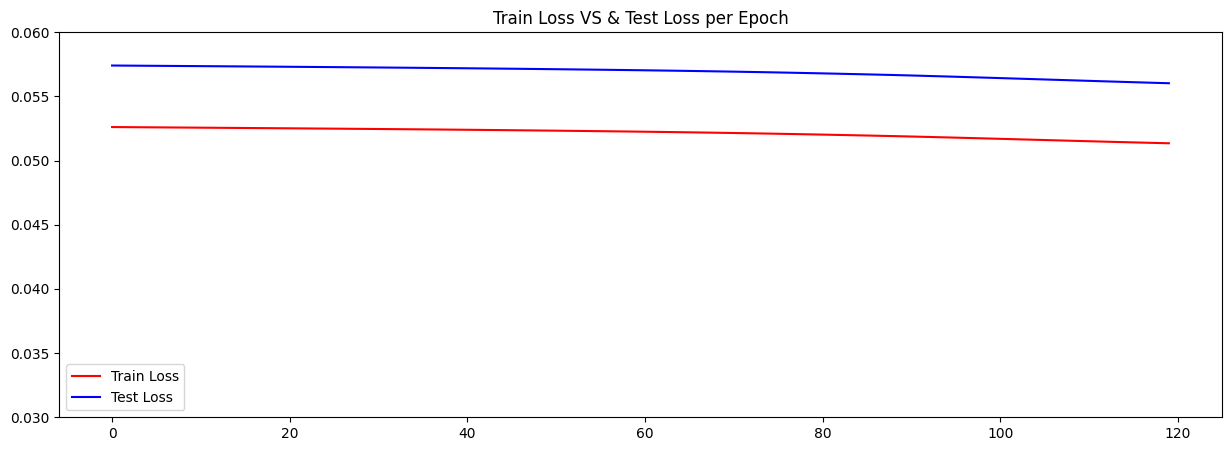

In [25]:
loss_vs_epochs(train_losses_list_1st, test_losses_list_1st)

In [26]:
show_results(test_sentences, probabilities_forecast_vectors_1st)

5 sentences the model has trained: 
#1 Predictions: [0.1268, 0.0372, 0.2914, 0.4863, 0.0584] 	--> 😞  I like you a lot
#2 Predictions: [0.1403, 0.0391, 0.2897, 0.4636, 0.0673] 	--> 😞  Let us go play baseball
#3 Predictions: [0.1646, 0.0565, 0.3184, 0.3814, 0.0791] 	--> 😞  Good joke
#4 Predictions: [0.1646, 0.0565, 0.3184, 0.3814, 0.0791] 	--> 😞  I am upset
#5 Predictions: [0.1646, 0.0565, 0.3184, 0.3814, 0.0791] 	--> 😞  I want chinese food

 5 new sentences: 
#6 Predictions: [0.1646, 0.0565, 0.3184, 0.3814, 0.0791] 	--> 😞  I love my grandpa
#7 Predictions: [0.1646, 0.0565, 0.3184, 0.3814, 0.0791] 	--> 😞  kick the ball
#8 Predictions: [0.1646, 0.0565, 0.3184, 0.3814, 0.0791] 	--> 😞  Be happy
#9 Predictions: [0.1646, 0.0565, 0.3184, 0.3814, 0.0791] 	--> 😞  I failed the test
#10 Predictions: [0.1646, 0.0565, 0.3184, 0.3814, 0.0791] 	--> 😞  Daniel eat only sushi


Predictions in the train set --> Emoji Scores

In [27]:
quality_control(train_emoji_scores_1st)

Label:0 ❤️ classified as Counter({3: 1679, 0: 1546, 2: 735}) 	True Positive:1546/3960	--> 39.04 %
Label:1 ⚾ classified as Counter({3: 964, 0: 889, 2: 427}) 	True Positive:0/2280	--> 0.0 %
Label:2 😄 classified as Counter({3: 2767, 0: 2596, 2: 1357}) 	True Positive:1357/6720	--> 20.193 %
Label:3 😞 classified as Counter({3: 2682, 0: 2422, 2: 1136}) 	True Positive:2682/6240	--> 42.981 %
Label:4 🍴 classified as Counter({3: 1168, 0: 1080, 2: 512}) 	True Positive:0/2760	--> 0.0 %

Total True Positive: 5585/21960 --> 25.433 %


Predictions in the test set --> Emoji Scores

In [28]:
quality_control(test_emoji_scores_1st)

Label:0 ❤️ classified as Counter({3: 357, 0: 322, 2: 161}) 	True Positive:322/840	--> 38.333 %
Label:1 ⚾ classified as Counter({3: 408, 0: 368, 2: 184}) 	True Positive:0/960	--> 0.0 %
Label:2 😄 classified as Counter({3: 918, 0: 828, 2: 414}) 	True Positive:414/2160	--> 19.167 %
Label:3 😞 classified as Counter({3: 816, 0: 736, 2: 368}) 	True Positive:816/1920	--> 42.5 %
Label:4 🍴 classified as Counter({3: 357, 0: 322, 2: 161}) 	True Positive:0/840	--> 0.0 %

Total True Positive: 1552/6720 --> 23.095 %


### Findings - NN model
1. Loss - It can be seen that after a very slight decrease, the loss remains quite constant (both for the train set and for the test).
2. Train accuracy of the last epoch is 0.29508, and test accuracy is 0.28571.
3. The prediction is the same for all 10 sentences - disappointed emoji (label 3), when the probability for label 2 (happy) and for lable 3 (disappointed) is quite same. i.e., the model predicted only one correct emoji for each set of sentences (pne from five sentences).
4. In general - the total TP percentage is quite small (23%-25%). The model learned only three labels (0, 2, 3), when the best success is for label 3 (42% in the train set and the test set). This fact matches the sentences prediction.

# Second model - neural network with RNN

Build a neural network + RNN model that gets the vocabulary size, embedding dimention and pretrained embedding weights, and returns a 5 dimention vector with the scores of every emoji.

Then train the model and plot loss vs. epoch for train and test set.

https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

---

You can use the added model as your base model

In [29]:
class RNN_Model(nn.Module):
    
    def __init__(self,vocab_size,embedding_dim,pretrained_weight):
        super(RNN_Model,self).__init__()
        self.word_embeds = nn.Embedding(vocab_size, embedding_dim) # stores embeddings of a fixed dictionary and size
        self.word_embeds.weight.data.copy_(torch.from_numpy(pretrained_weight)) # place the pretrained weights to the embedding function
        self.rnn = nn.LSTM(embedding_dim, 128, 2,batch_first = True, dropout = 0.5) 
        self.layers = nn.Sequential(
         nn.Linear(128,64),
         nn.ReLU(),
         nn.Linear(64,32),
         nn.ReLU(),
         nn.Linear(32,10),
         nn.ReLU(),
         nn.Linear(10,5),
         nn.Softmax(dim = 1)
        )

    def forward(self,x,h):
        out = self.word_embeds(x)
        out, _ = self.rnn(out,h)
        out = out[:, -1, :]
        out = self.layers(out)
        return out

In [30]:
model_2nd = RNN_Model(vocabulary_leb, embedding_dim, pretrained_weight)
model_2nd

RNN_Model(
  (word_embeds): Embedding(400001, 50)
  (rnn): LSTM(50, 128, num_layers=2, batch_first=True, dropout=0.5)
  (layers): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=5, bias=True)
    (7): Softmax(dim=1)
  )
)

In [31]:
for param in model_2nd.parameters():
    param.requires_grad = True

In [32]:
optimizer_2nd = torch.optim.Adam(model_2nd.parameters(),lr=0.0001)
loss_func_2nd = torch.nn.CrossEntropyLoss().to(device)

In [33]:
# Transform the data and lables to tensors
# train data set
train_data_x_tensor_2nd = torch.from_numpy(train_data_to_indices)
train_data_y_tensor_2nd = torch.from_numpy(train_data_y)
train_data_tensor = torch.utils.data.TensorDataset(train_data_x_tensor_2nd, train_data_y_tensor_2nd)

# test data set
test_data_x_tensor_2nd = torch.from_numpy(test_data_to_indices)
test_data_y_tensor_2nd = torch.from_numpy(test_data_y)
test_data_tensor = torch.utils.data.TensorDataset(test_data_x_tensor_2nd, test_data_y_tensor_2nd)

In [34]:
# Create train and test data 
train_loader_2nd = torch.utils.data.DataLoader(dataset=train_data_tensor, batch_size=batch_size, num_workers=num_workers)
test_loader_2nd = torch.utils.data.DataLoader(dataset=test_data_tensor, batch_size=batch_size, num_workers=num_workers)

In [35]:
train_losses_list_2nd, train_accuracy_list_2nd, test_losses_list_2nd, test_accuracy_list_2nd, \
trained_model_2nd, probabilities_forecast_vectors_2nd, train_emoji_scores_2nd, test_emoji_scores_2nd = \
train_model("RNN", device, epochs, train_loader_2nd, test_loader_2nd, model_2nd, optimizer_2nd, loss_func_2nd, train_data_x_tensor_2nd, test_data_x_tensor_2nd, test_sentences)

Epoch:1/120 	Train Loss:0.05285 	Train Accuracy:0.10383 	Test Loss:0.05754 	Test Accuracy:0.14286
Epoch:11/120 	Train Loss:0.05283 	Train Accuracy:0.10383 	Test Loss:0.05752 	Test Accuracy:0.14286
Epoch:21/120 	Train Loss:0.05278 	Train Accuracy:0.10383 	Test Loss:0.05745 	Test Accuracy:0.14286
Epoch:31/120 	Train Loss:0.05105 	Train Accuracy:0.38798 	Test Loss:0.05572 	Test Accuracy:0.32143
Epoch:41/120 	Train Loss:0.04771 	Train Accuracy:0.53005 	Test Loss:0.05333 	Test Accuracy:0.48214
Epoch:51/120 	Train Loss:0.04602 	Train Accuracy:0.56831 	Test Loss:0.0522 	Test Accuracy:0.48214
Epoch:61/120 	Train Loss:0.04492 	Train Accuracy:0.57923 	Test Loss:0.05103 	Test Accuracy:0.53571
Epoch:71/120 	Train Loss:0.04375 	Train Accuracy:0.61202 	Test Loss:0.04955 	Test Accuracy:0.57143
Epoch:81/120 	Train Loss:0.04276 	Train Accuracy:0.62295 	Test Loss:0.04921 	Test Accuracy:0.55357
Epoch:91/120 	Train Loss:0.04133 	Train Accuracy:0.71038 	Test Loss:0.04734 	Test Accuracy:0.64286
Epoch:101/12

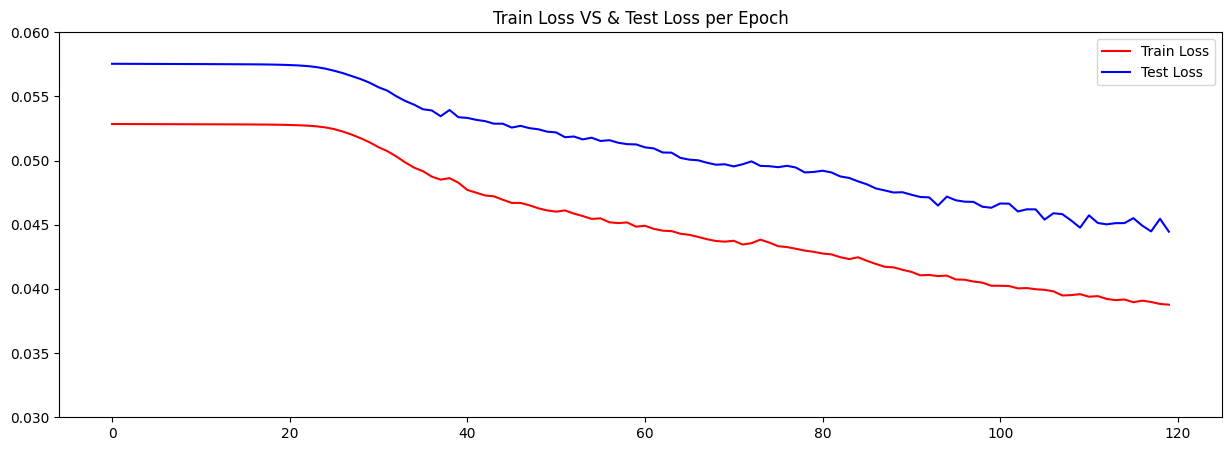

In [36]:
loss_vs_epochs(train_losses_list_2nd, test_losses_list_2nd)

In [37]:
show_results(test_sentences, probabilities_forecast_vectors_2nd)

5 sentences the model has trained: 
#1 Predictions: [0.0559, 0.0134, 0.4216, 0.2706, 0.2386] 	--> 😄  I like you a lot
#2 Predictions: [0.2109, 0.0726, 0.1364, 0.4906, 0.0895] 	--> 😞  Let us go play baseball
#3 Predictions: [0.0041, 0.0044, 0.9099, 0.0303, 0.0513] 	--> 😄  Good joke
#4 Predictions: [0.2033, 0.0422, 0.073, 0.5932, 0.0883] 	--> 😞  I am upset
#5 Predictions: [0.0967, 0.0091, 0.0697, 0.2049, 0.6196] 	--> 🍴  I want chinese food

 5 new sentences: 
#6 Predictions: [0.2278, 0.0284, 0.0492, 0.5499, 0.1447] 	--> 😞  I love my grandpa
#7 Predictions: [0.2022, 0.2737, 0.2277, 0.2019, 0.0945] 	--> ⚾  kick the ball
#8 Predictions: [0.1356, 0.0272, 0.1873, 0.4482, 0.2017] 	--> 😞  Be happy
#9 Predictions: [0.2117, 0.0606, 0.1013, 0.5439, 0.0823] 	--> 😞  I failed the test
#10 Predictions: [0.2077, 0.0533, 0.0868, 0.275, 0.3772] 	--> 🍴  Daniel eat only sushi


Predictions in the train set --> Emoji Scores

In [38]:
quality_control(train_emoji_scores_2nd)

Label:0 ❤️ classified as Counter({3: 2502, 1: 1047, 2: 309, 4: 102}) 	True Positive:0/3960	--> 0.0 %
Label:1 ⚾ classified as Counter({1: 1592, 3: 403, 2: 285}) 	True Positive:1592/2280	--> 69.825 %
Label:2 😄 classified as Counter({2: 5134, 1: 1436, 3: 148, 4: 2}) 	True Positive:5134/6720	--> 76.399 %
Label:3 😞 classified as Counter({3: 3814, 1: 1629, 2: 796, 4: 1}) 	True Positive:3814/6240	--> 61.122 %
Label:4 🍴 classified as Counter({3: 1051, 4: 690, 1: 633, 2: 386}) 	True Positive:690/2760	--> 25.0 %

Total True Positive: 11230/21960 --> 51.138 %


Predictions in the test set --> Emoji Scores

In [39]:
quality_control(test_emoji_scores_2nd)

Label:0 ❤️ classified as Counter({3: 512, 1: 225, 2: 103}) 	True Positive:0/840	--> 0.0 %
Label:1 ⚾ classified as Counter({1: 584, 2: 236, 3: 140}) 	True Positive:584/960	--> 60.833 %
Label:2 😄 classified as Counter({2: 1242, 1: 473, 3: 415, 4: 30}) 	True Positive:1242/2160	--> 57.5 %
Label:3 😞 classified as Counter({3: 1224, 1: 489, 2: 207}) 	True Positive:1224/1920	--> 63.75 %
Label:4 🍴 classified as Counter({3: 378, 1: 195, 4: 167, 2: 100}) 	True Positive:167/840	--> 19.881 %

Total True Positive: 3217/6720 --> 47.872 %


### Findings - RNN model
1. Loss - It can be seen a significant decrease, both for the train set and for the test.
2. Train accuracy of the last epoch is 0.74863, and test accuracy is 0.69643 (higher than our NN model).
3. The model predicted three correct emoji for each set of sentences (three from five sentences). For the trained sentences, the model succeesed to predicte label 2 (smile), label 3 (disappointed), and label 4 (fork & knife). For the new sentences, the model succeesed to predicte label 1 (baseball), label 3 (disappointed), and label 4 (fork & knife).
4. In general - the total TP percentage is higher than our NN model (~50%). The model learned four labels (1, 2, 3, 4), when the TP percentage is among 60-70% for lables 1,2,3. This fact matches the sentences prediction.

# Third model - neural network with transformers

Build a neural network + transformer model that gets the vocabulary size, embedding dimention and pretrained embedding weights, and returns a 5 dimention vector with the scores of every emoji.

Then train the model and plot loss vs. epoch for train and test set.

https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html


---

You can use the added model as your base model

In [40]:
### START CODE HERE ###

In [41]:
import math

class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [42]:
class Transformer_model(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, pretrained_weight, transformer_dim):
        super(Transformer_model,self).__init__()
        self.word_embeds = nn.Embedding(vocab_size, embedding_dim)
        self.word_embeds.weight.data.copy_(torch.from_numpy(pretrained_weight))
        self.pos_encoding = PositionalEncoding(embedding_dim)
        self.transformer = nn.Transformer(d_model=transformer_dim, nhead=5, num_encoder_layers=1, num_decoder_layers=1)
        self.attention = nn.MultiheadAttention(embed_dim=transformer_dim, num_heads=5)
        self.embeds_to_transformer = nn.Linear(embedding_dim, transformer_dim)
        self.layers = nn.Sequential(
            nn.Linear(transformer_dim, transformer_dim//2),
            nn.Linear(transformer_dim//2,transformer_dim//4),
            nn.Linear(transformer_dim//4 ,5),
            nn.Softmax(dim = 1)
        )
        
    def forward(self,x):
        out = self.word_embeds(x)
        out += self.pos_encoding(out)
        out = self.embeds_to_transformer(out)
        out = self.transformer(out, out)
        out = torch.sum(out, axis = 1)
        out = self.layers(out)
        return out



In [43]:
transformer_dim = 100

In [44]:
model_3rd = Transformer_model(vocabulary_leb, embedding_dim, pretrained_weight, transformer_dim)
model_3rd

Transformer_model(
  (word_embeds): Embedding(400001, 50)
  (pos_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=100, out_features=100, bias=True)
          )
          (linear1): Linear(in_features=100, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=100, bias=True)
          (norm1): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): Transform

In [45]:
for param in model_3rd.parameters():
    param.requires_grad = True

In [46]:
optimizer_3rd = torch.optim.Adam(model_3rd.parameters(),lr=0.0001)
loss_func_3rd = torch.nn.CrossEntropyLoss().to(device)

In [47]:
# Transform the data and lables to tensors
# train data set
train_data_x_tensor_3rd = torch.from_numpy(train_data_to_indices)
train_data_y_tensor_3rd = torch.from_numpy(train_data_y)
train_data_tensor_3rd = torch.utils.data.TensorDataset(train_data_x_tensor_3rd, train_data_y_tensor_3rd)

# test data set
test_data_x_tensor_3rd = torch.from_numpy(test_data_to_indices)
test_data_y_tensor_3rd = torch.from_numpy(test_data_y)
test_data_tensor_3rd = torch.utils.data.TensorDataset(test_data_x_tensor_3rd, test_data_y_tensor_3rd)

In [48]:
# Create train and test data 
train_loader_3rd = torch.utils.data.DataLoader(dataset=train_data_tensor_3rd, batch_size=batch_size, num_workers=num_workers)
test_loader_3rd = torch.utils.data.DataLoader(dataset=test_data_tensor_3rd, batch_size=batch_size, num_workers=num_workers)

In [49]:
train_losses_list_3rd, train_accuracy_list_3rd, test_losses_list_3rd, test_accuracy_list_3rd, \
trained_model_3rd, probabilities_forecast_vectors_3rd, train_emoji_scores_3rd, test_emoji_scores_3rd = \
train_model("Transformer", device, epochs, train_loader_3rd, test_loader_3rd, model_3rd, optimizer_3rd, loss_func_3rd, train_data_x_tensor_3rd, test_data_x_tensor_3rd, test_sentences)

Epoch:1/120 	Train Loss:0.05318 	Train Accuracy:0.25683 	Test Loss:0.0579 	Test Accuracy:0.28571
Epoch:11/120 	Train Loss:0.04782 	Train Accuracy:0.45902 	Test Loss:0.0556 	Test Accuracy:0.30357
Epoch:21/120 	Train Loss:0.04577 	Train Accuracy:0.52459 	Test Loss:0.05501 	Test Accuracy:0.375
Epoch:31/120 	Train Loss:0.04288 	Train Accuracy:0.62842 	Test Loss:0.05349 	Test Accuracy:0.41071
Epoch:41/120 	Train Loss:0.04036 	Train Accuracy:0.71585 	Test Loss:0.05155 	Test Accuracy:0.44643
Epoch:51/120 	Train Loss:0.03886 	Train Accuracy:0.74863 	Test Loss:0.05019 	Test Accuracy:0.48214
Epoch:61/120 	Train Loss:0.03742 	Train Accuracy:0.80328 	Test Loss:0.04847 	Test Accuracy:0.55357
Epoch:71/120 	Train Loss:0.03613 	Train Accuracy:0.82514 	Test Loss:0.0473 	Test Accuracy:0.60714
Epoch:81/120 	Train Loss:0.03468 	Train Accuracy:0.88525 	Test Loss:0.04692 	Test Accuracy:0.57143
Epoch:91/120 	Train Loss:0.03365 	Train Accuracy:0.9071 	Test Loss:0.04459 	Test Accuracy:0.71429
Epoch:101/120 	Tr

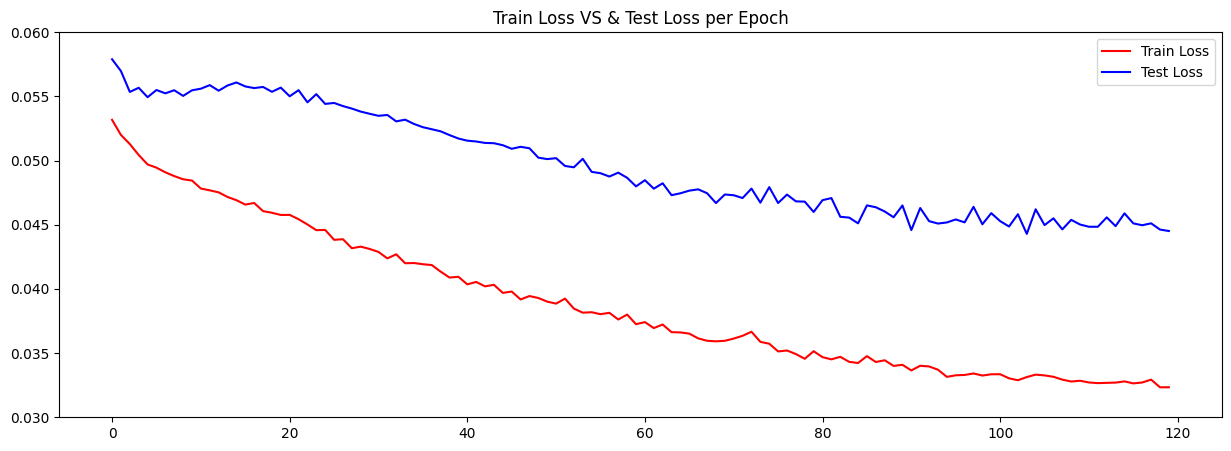

In [50]:
loss_vs_epochs(train_losses_list_3rd, test_losses_list_3rd)

In [51]:
show_results(test_sentences, probabilities_forecast_vectors_3rd)

5 sentences the model has trained: 
#1 Predictions: [0.9965, 0.0027, 0.0008, 0.0, 0.0] 	--> ❤️  I like you a lot
#2 Predictions: [0.0273, 0.9091, 0.0005, 0.0629, 0.0003] 	--> ⚾  Let us go play baseball
#3 Predictions: [0.1655, 0.0049, 0.8266, 0.003, 0.0001] 	--> 😄  Good joke
#4 Predictions: [0.1242, 0.0072, 0.021, 0.8473, 0.0004] 	--> 😞  I am upset
#5 Predictions: [0.0026, 0.0041, 0.0536, 0.0195, 0.9201] 	--> 🍴  I want chinese food

 5 new sentences: 
#6 Predictions: [0.9998, 0.0002, 0.0001, 0.0, 0.0] 	--> ❤️  I love my grandpa
#7 Predictions: [0.001, 0.9971, 0.0018, 0.0001, 0.0] 	--> ⚾  kick the ball
#8 Predictions: [0.0311, 0.131, 0.8322, 0.0056, 0.0001] 	--> 😄  Be happy
#9 Predictions: [0.0253, 0.9553, 0.0064, 0.013, 0.0] 	--> ⚾  I failed the test
#10 Predictions: [0.0017, 0.0017, 0.0001, 0.0013, 0.9952] 	--> 🍴  Daniel eat only sushi


Predictions in the train set --> Emoji Scores

In [52]:
quality_control(train_emoji_scores_3rd)

Label:0 ❤️ classified as Counter({0: 2519, 2: 661, 3: 586, 4: 163, 1: 31}) 	True Positive:2519/3960	--> 63.611 %
Label:1 ⚾ classified as Counter({1: 747, 3: 667, 2: 601, 0: 222, 4: 43}) 	True Positive:747/2280	--> 32.763 %
Label:2 😄 classified as Counter({2: 5723, 3: 772, 0: 189, 4: 19, 1: 17}) 	True Positive:5723/6720	--> 85.164 %
Label:3 😞 classified as Counter({3: 5484, 2: 610, 4: 81, 0: 64, 1: 1}) 	True Positive:5484/6240	--> 87.885 %
Label:4 🍴 classified as Counter({4: 1833, 2: 465, 3: 448, 0: 14}) 	True Positive:1833/2760	--> 66.413 %

Total True Positive: 16306/21960 --> 74.253 %


Predictions in the test set --> Emoji Scores

In [53]:
quality_control(test_emoji_scores_3rd)

Label:0 ❤️ classified as Counter({0: 393, 3: 313, 2: 130, 4: 4}) 	True Positive:393/840	--> 46.786 %
Label:1 ⚾ classified as Counter({2: 375, 3: 252, 1: 175, 0: 130, 4: 28}) 	True Positive:175/960	--> 18.229 %
Label:2 😄 classified as Counter({2: 1206, 3: 416, 0: 404, 1: 98, 4: 36}) 	True Positive:1206/2160	--> 55.833 %
Label:3 😞 classified as Counter({3: 1336, 2: 466, 0: 108, 4: 10}) 	True Positive:1336/1920	--> 69.583 %
Label:4 🍴 classified as Counter({4: 337, 2: 261, 3: 124, 1: 97, 0: 21}) 	True Positive:337/840	--> 40.119 %

Total True Positive: 3447/6720 --> 51.295 %


### Findings - NN with transformers model
1. Loss - It can be seen a very significant decrease for the train set, and significant decrease for the test.
2. Train accuracy of the last epoch is 0.92896 (higher than our NN and RNN models), and test accuracy is 0.625.
3. For the trained sentences, the model succeesed to predicte the correct emoji of all(!) sentences (five from five sentences). For the new sentences, the model succeesed to predicte the correct emoji of four sentences (everything except label 3,  disappointed).
4. In general - the total TP percentage for the train set is higher than our NN and RNN models (~75%),  and for the test set is 51%. The model learned all five labels, and this fact matches the sentences prediction.

### Compare between the models - who had the best results? Try to explain why. 

First, we describe our train set.
The train set is quite small - 183 examples in total: heart emoji (label: 0) has 33 examples, baseball (label: 1) - 19 examples, smile (label: 2) - 56 examples, disappointed (label: 3) - 52 examples, (label: 4) fork & knife:- 23 examples.
This segmentation of the train set, among other things, affected the prediction (for example - in the first model, the only emoji predicted is a disappointed emoji).

Vanilla NN is a "one to one" model, and does not include process sequences, i.e., it does not have an internal state that is updated as a sequence is processed (like RNN). Therefore, our NN model did not remembered the context of each sentence, and succeeded to predict the correct emoji of only 1/5 sentences.


"LSTMs" are a special kind of RNNs, capable of learning long-term dependencies. The LSTM can remove or add information to the cell state, carefully regulated by the ‘f’ and ‘i’ gates. But, in these model the last hidden state of the encoder is used in order to initialize the decoder, and all the intermediate states of the encoder are ignored. The expectation is that (with the help of the memory components), the last hidden state will be a good summary of the input sentence. However, even LSTMs still become forgetful. Because of that, our model succeeded to predict the correct emoji of only 3/5 sentences.


NN with transformers model enables the model to “focus” on the important parts of the input, while ignoring irrelevant information, thanks to the attention head. We used multi-head attention that allows the model to jointly attend to information from diffrent representation subapces at different positions. Because of that, out model predicted the correct emoji of 5/5 trained sentences, and 4/5 new sentences.

